<a href="https://colab.research.google.com/github/sukhpreet111/CAB-BOOKING/blob/main/CAB_BOOKING_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/sukhpreet111/CAB-BOOKING/refs/heads/main/Namma_yatri_data.csv")

In [70]:
data.head()

,City,Searches,Searches which got estimate,Searches for Quotes,Searches which got Quotes,Bookings,Completed Trips,Search-to-estimate Rate,Rider Fare Acceptance Rate,Driver Quote Acceptance Rate,...,Booking Cancellation Rate,Driver Cancellation Rate,User Cancellation Rate,Conversion Rate,Drivers' Earnings,Average Distance per Trip (km),Average Fare per Trip,Distance Travelled (km),Cancellation_Segment,Cancellation_Segment_Label
0,Bangalore,"13,36,78,174","11,98,99,866","10,43,92,222","5,80,76,082","5,72,20,933","3,63,80,329",89.7%,87.1%,55.6%,...,36.4,22.5,13.8,27.2%,"₹5,14,97,58,044",7.54,₹135.64,"28,45,82,938",0,Low Cancellation
1,Kolkata,"1,64,33,036","1,59,55,942","1,00,80,497","62,00,694","50,49,073","29,85,299",97.1%,63.2%,61.5%,...,40.9,17.1,19.2,18.2%,"₹79,87,56,227",9.49,₹239.60,"3,33,09,365",0,Low Cancellation
2,Kochi,"19,09,082","18,11,065","11,46,766","8,34,920","7,57,908","5,16,972",94.9%,63.3%,72.8%,...,28.5,10.7,17.1,27.1%,"₹12,51,73,631",9.72,₹251.66,"47,50,219",0,Low Cancellation
3,Chennai,"27,77,020","27,35,741","12,62,282","6,90,006","6,87,618","3,68,974",98.5%,46.1%,54.7%,...,46.3,23.5,22.4,13.3%,"₹5,65,05,740",8.51,₹162.80,"28,74,157",1,High Cancellation
4,Mysore,"5,09,102","4,98,886","2,94,152","2,67,197","2,62,530","1,74,103",98.0%,59.0%,90.8%,...,33.7,14.2,19.3,34.2%,"₹1,51,38,573",4.88,₹86.88,"8,48,917",0,Low Cancellation


In [71]:
data = data[data['City'] != 'India Total']

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            8 non-null      object 
 1   Searches                        8 non-null      object 
 2   Searches which got estimate     8 non-null      object 
 3   Searches for Quotes             8 non-null      object 
 4   Searches which got Quotes       8 non-null      object 
 5   Bookings                        8 non-null      object 
 6   Completed Trips                 8 non-null      object 
 7   Search-to-estimate Rate         8 non-null      object 
 8   Rider Fare Acceptance  Rate     8 non-null      object 
 9   Driver Quote Acceptance Rate    8 non-null      object 
 10  Quote-to-booking Rate           8 non-null      object 
 11  Cancelled Bookings              8 non-null      float64
 12  Booking Cancellation Rate       8 non-null   

In [6]:
data['Cancelled Bookings'] = data['Cancelled Bookings'].str.replace(',', '').astype(float)

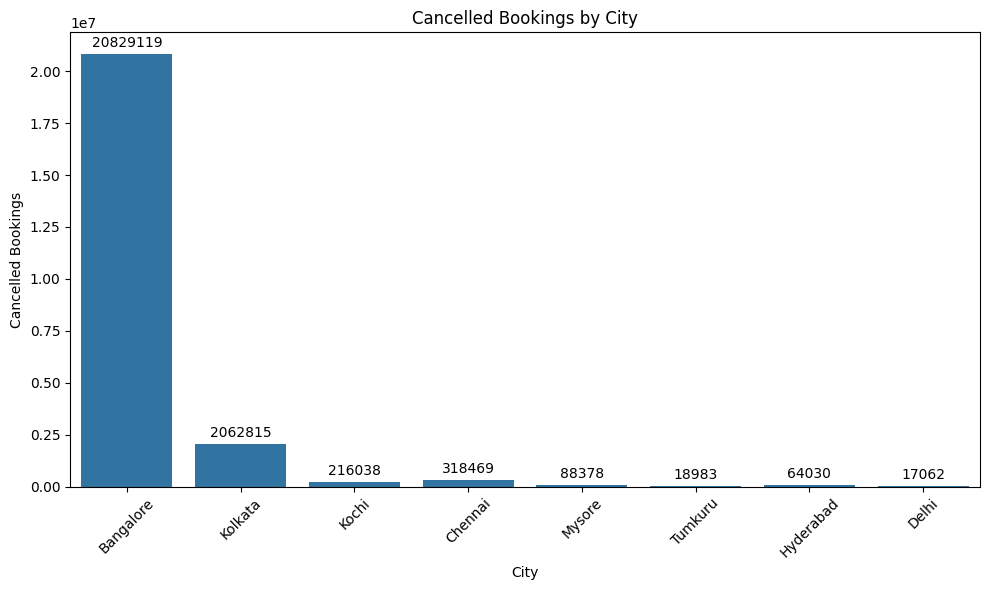

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(ax=axes, x='City', y='Cancelled Bookings', data=data)
axes.set_title('Cancelled Bookings by City')
axes.tick_params(axis='x', rotation=45)

for container in axes.containers:
    axes.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()


In [8]:
cancel_cols = ['Booking Cancellation Rate', 'Driver Cancellation Rate', 'User Cancellation Rate']

# Convert % strings to float values
for col in cancel_cols:
    data[col] = data[col].str.replace('%', '').astype(float)

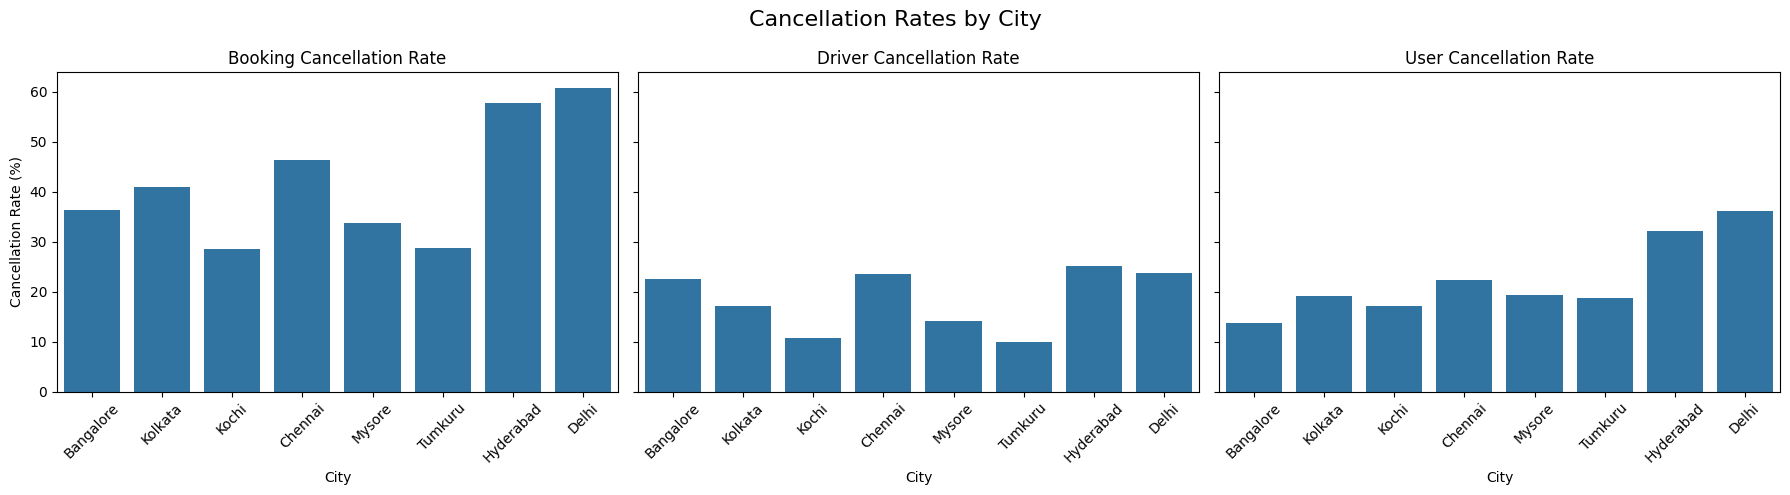

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.barplot(ax=axes[0], x='City', y='Booking Cancellation Rate', data=data)
axes[0].set_title('Booking Cancellation Rate')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Cancellation Rate (%)')

sns.barplot(ax=axes[1], x='City', y='Driver Cancellation Rate', data=data)
axes[1].set_title('Driver Cancellation Rate')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[2], x='City', y='User Cancellation Rate', data=data)
axes[2].set_title('User Cancellation Rate')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Cancellation Rates by City', fontsize=16)
plt.tight_layout()
plt.show()


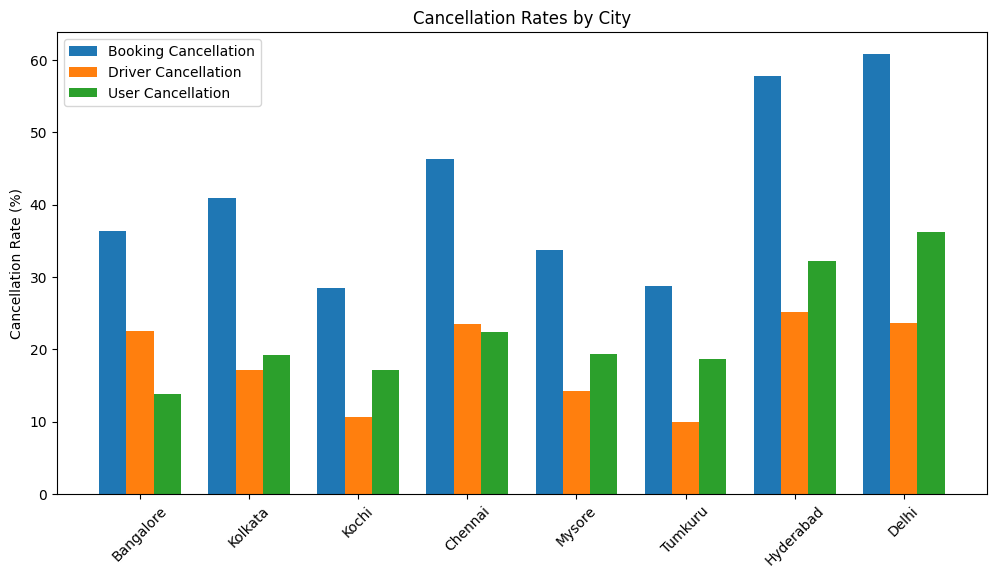

In [10]:
# Prepare data
cities = data['City'].tolist()
booking = data['Booking Cancellation Rate'].astype(float).tolist()
driver = data['Driver Cancellation Rate'].astype(float).tolist()
user = data['User Cancellation Rate'].astype(float).tolist()

x = np.arange(len(cities))  # the label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12,6))

# Plot each cancellation type side by side
rects1 = ax.bar(x - width, booking, width, label='Booking Cancellation')
rects2 = ax.bar(x, driver, width, label='Driver Cancellation')
rects3 = ax.bar(x + width, user, width, label='User Cancellation')

# Labels and formatting
ax.set_ylabel('Cancellation Rate (%)')
ax.set_title('Cancellation Rates by City')
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45)
ax.legend()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[cancel_cols])

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['Cancellation_Segment'] = kmeans.fit_predict(X_scaled)

In [13]:
import numpy as np

centers = scaler.inverse_transform(kmeans.cluster_centers_)  # back to original scale
for i, center in enumerate(centers):
    print(f"Cluster {i} centers:")
    for col, val in zip(cancel_cols, center):
        print(f"  {col}: {val:.2f}%")


Cluster 0 centers:
  Booking Cancellation Rate: 33.66%
  Driver Cancellation Rate: 14.88%
  User Cancellation Rate: 17.62%
Cluster 1 centers:
  Booking Cancellation Rate: 54.97%
  Driver Cancellation Rate: 24.10%
  User Cancellation Rate: 30.27%


In [14]:
# Find cluster with lower average booking cancellation rate
low_cancel_cluster = np.argmin(centers[:, 0])

# Map cluster number to segment label
data['Cancellation_Segment_Label'] = data['Cancellation_Segment'].apply(
    lambda x: 'Low Cancellation' if x == low_cancel_cluster else 'High Cancellation'
)


In [15]:
print(data[['City', 'Booking Cancellation Rate', 'Driver Cancellation Rate', 'User Cancellation Rate', 'Cancellation_Segment_Label']])


        City  Booking Cancellation Rate  Driver Cancellation Rate  \
0  Bangalore                       36.4                      22.5   
1    Kolkata                       40.9                      17.1   
2      Kochi                       28.5                      10.7   
3    Chennai                       46.3                      23.5   
4     Mysore                       33.7                      14.2   
5    Tumkuru                       28.8                       9.9   
6  Hyderabad                       57.8                      25.1   
7      Delhi                       60.8                      23.7   

   User Cancellation Rate Cancellation_Segment_Label  
0                    13.8           Low Cancellation  
1                    19.2           Low Cancellation  
2                    17.1           Low Cancellation  
3                    22.4          High Cancellation  
4                    19.3           Low Cancellation  
5                    18.7           Low Cancella

Working with data1

In [16]:
data11 = pd.read_csv("https://raw.githubusercontent.com/sukhpreet111/CAB-BOOKING/refs/heads/main/sigma_cabs.csv")

In [17]:
data1 = data11.copy()

In [18]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [19]:
data1.drop(columns=['Trip_ID','Var1','Var2','Var3'], inplace=True) #removing irrelevant columns for study

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Gender                       131662 non-null  object 
 9   Surge_Pricing_Type           131662 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 10.0+ MB


In [21]:
data1.isnull().sum()

,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,5920
Life_Style_Index,20193
Confidence_Life_Style_Index,20193
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Gender,0
Surge_Pricing_Type,0


In [22]:
for col in data1.select_dtypes(include='object').columns:
    data1[col].fillna('Unknown', inplace=True)

<ipython-input-22-caab48aac85b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna('Unknown', inplace=True)


In [23]:
data1['Customer_Since_Months'].fillna(data1['Customer_Since_Months'].median(), inplace=True)
data1['Life_Style_Index'].fillna(data1['Life_Style_Index'].median(), inplace=True)

<ipython-input-23-bac92fc57bc7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Customer_Since_Months'].fillna(data1['Customer_Since_Months'].median(), inplace=True)
<ipython-input-23-bac92fc57bc7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [24]:
data1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,Male,2
2,41.58,Unknown,10.0,2.79805,Unknown,E,3.50125,2,Male,2
3,61.56,C,10.0,2.79805,Unknown,A,3.45375,0,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,Male,2


In [25]:
from sklearn.preprocessing import LabelEncoder
for col in data1.select_dtypes(include='object').columns:
    data1[col] = LabelEncoder().fit_transform(data1[col])

In [26]:
features = [
    'Trip_Distance',
    'Type_of_Cab',
    'Customer_Since_Months',
    'Life_Style_Index',
    'Confidence_Life_Style_Index',
    'Destination_Type',
    'Customer_Rating',
    'Gender',
    'Surge_Pricing_Type'
]

In [27]:
X = data1[features]

In [28]:
X.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.90500,0,2
1,29.47,1,10.0,2.78245,1,0,3.45000,1,2
2,41.58,5,10.0,2.79805,3,4,3.50125,1,2
3,61.56,2,10.0,2.79805,3,0,3.45375,1,3
4,54.95,2,10.0,3.03453,1,0,3.40250,1,2


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42) #assuming k=4 initially
data1['Segment'] = kmeans.fit_predict(X_scaled)
print(data1.groupby('Segment')[features].mean())

         Trip_Distance  Type_of_Cab  Customer_Since_Months  Life_Style_Index  \
Segment                                                                        
0            78.984583     2.563606               7.056100          2.994700   
1            31.023610     2.072542               5.672344          2.721541   
2            36.015342     2.154980               5.663835          2.761934   
3            37.679221     2.150962               5.859753          2.767674   

         Confidence_Life_Style_Index  Destination_Type  Customer_Rating  \
Segment                                                                   
0                           1.439143          0.633237         2.862875   
1                           0.398246          1.164829         2.871096   
2                           2.416449          1.062900         2.818750   
3                           1.274957          1.060162         2.840589   

           Gender  Surge_Pricing_Type  
Segment                     

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

std_devs = np.sqrt(pca.explained_variance_)

prop_variance = pca.explained_variance_ratio_

cumulative_prop = np.cumsum(prop_variance)

components = pd.DataFrame({
    'Standard Deviation': std_devs.round(4),
    'Proportion of Variance': prop_variance.round(4),
    'Cumulative Proportion': cumulative_prop.round(4)
})
components.index = [f"PC{i+1}" for i in range(len(components))]
components_T = components.T

print("Importance of Components:")
print(components_T)



Importance of Components:
                           PC1     PC2     PC3     PC4     PC5     PC6  \
Standard Deviation      1.2786  1.2128  1.0636  1.0002  0.9841  0.9625   
Proportion of Variance  0.1816  0.1634  0.1257  0.1112  0.1076  0.1029   
Cumulative Proportion   0.1816  0.3451  0.4707  0.5819  0.6895  0.7925   

                           PC7     PC8     PC9  
Standard Deviation      0.8928  0.7927  0.6650  
Proportion of Variance  0.0886  0.0698  0.0491  
Cumulative Proportion   0.8810  0.9509  1.0000  


In [32]:
# Get the factor loadings (i.e., the PCA components)
factor_loadings = pca.components_

# Print the factor loadings matrix (11 x 11)
factor_loadings_df = pd.DataFrame(factor_loadings,
                                   columns=[f"PC{i+1}" for i in range(factor_loadings.shape[1])],
                                   index=X.columns)
factor_loadings_df = factor_loadings_df.round(3)

print("Factor Loadings (Rotation Matrix):")
print(factor_loadings_df)

Factor Loadings (Rotation Matrix):
                               PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
Trip_Distance                0.641  0.200  0.265  0.506  0.304 -0.240 -0.080   
Type_of_Cab                 -0.134  0.520 -0.046 -0.430  0.065 -0.037 -0.432   
Customer_Since_Months       -0.015  0.370 -0.201  0.221  0.023  0.639  0.546   
Life_Style_Index            -0.009 -0.017 -0.058 -0.016  0.095  0.005  0.008   
Confidence_Life_Style_Index -0.069  0.148  0.718  0.057 -0.656  0.077  0.047   
Destination_Type            -0.178 -0.205  0.564 -0.140  0.611  0.443 -0.122   
Customer_Rating             -0.290  0.312  0.216 -0.168  0.290 -0.548  0.594   
Gender                       0.084 -0.618  0.030 -0.190 -0.056 -0.110  0.318   
Surge_Pricing_Type           0.666  0.095  0.046 -0.650 -0.049  0.139  0.193   

                               PC8    PC9  
Trip_Distance                0.008  0.258  
Type_of_Cab                  0.001  0.576  
Customer_Since_Months       -0.0

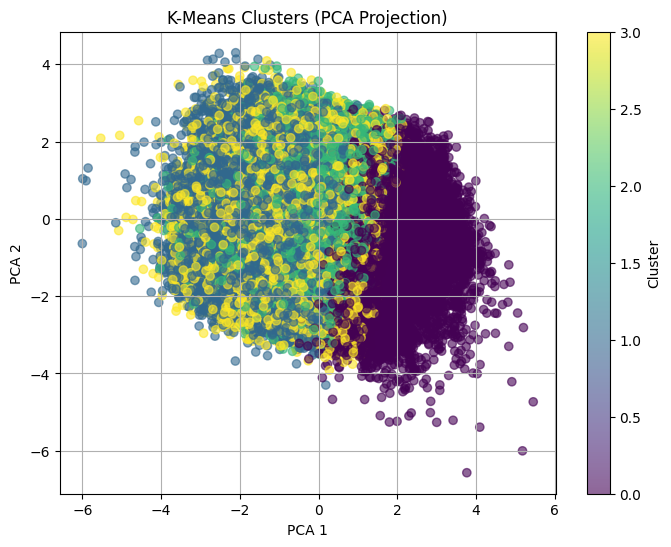

In [33]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1['Segment'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters (PCA Projection)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

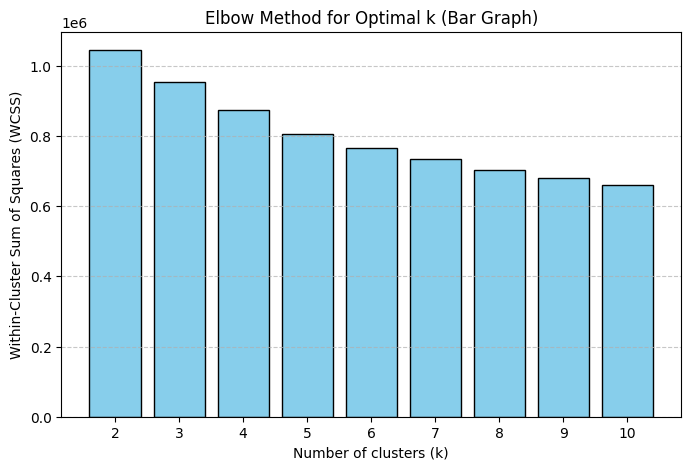

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.bar(k_values, wcss, color='skyblue', edgecolor='black')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k (Bar Graph)')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-35-fe917b2d7aac>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ari_data, labels=[str(k) for k in k_values])


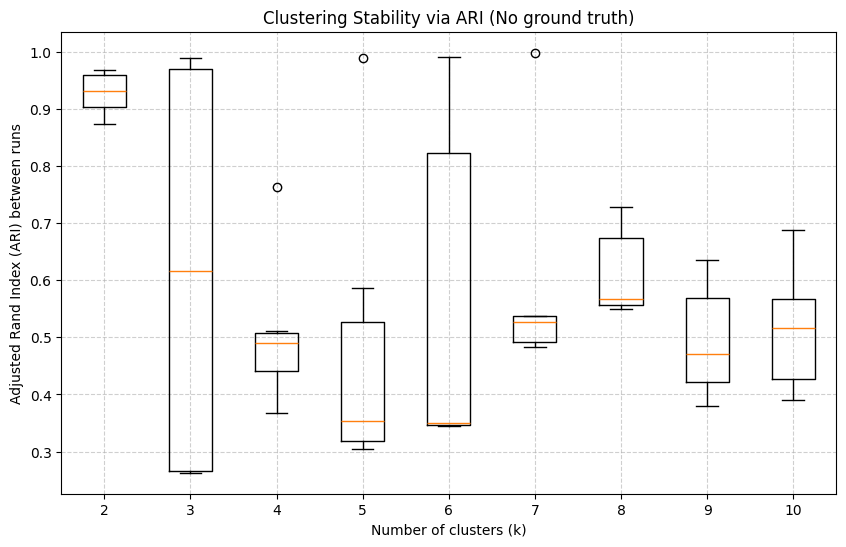

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from itertools import combinations

k_values = range(2, 11)
n_runs = 4

ari_scores = {k: [] for k in k_values}

for k in k_values:
    clusterings = []
    # Run k-means n_runs times for current k
    for run in range(n_runs):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=run)
        labels = kmeans.fit_predict(X_pca)
        clusterings.append(labels)

    # Calculate ARI between all pairs of runs
    for (labels1, labels2) in combinations(clusterings, 2):
        ari = adjusted_rand_score(labels1, labels2)
        ari_scores[k].append(ari)

# Prepare data for boxplot
ari_data = [ari_scores[k] for k in k_values]

plt.figure(figsize=(10,6))
plt.boxplot(ari_data, labels=[str(k) for k in k_values])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI) between runs')
plt.title('Clustering Stability via ARI (No ground truth)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [36]:
data1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type,Segment
0,6.77,1,1.0,2.42769,0,0,3.90500,0,0,2,3
1,29.47,1,10.0,2.78245,1,0,3.45000,0,1,2,1
2,41.58,5,10.0,2.79805,3,4,3.50125,2,1,2,2
3,61.56,2,10.0,2.79805,3,0,3.45375,0,1,3,2
4,54.95,2,10.0,3.03453,1,0,3.40250,4,1,2,0


K OPTIMUM VALUE IS DECIDED AS K = 4

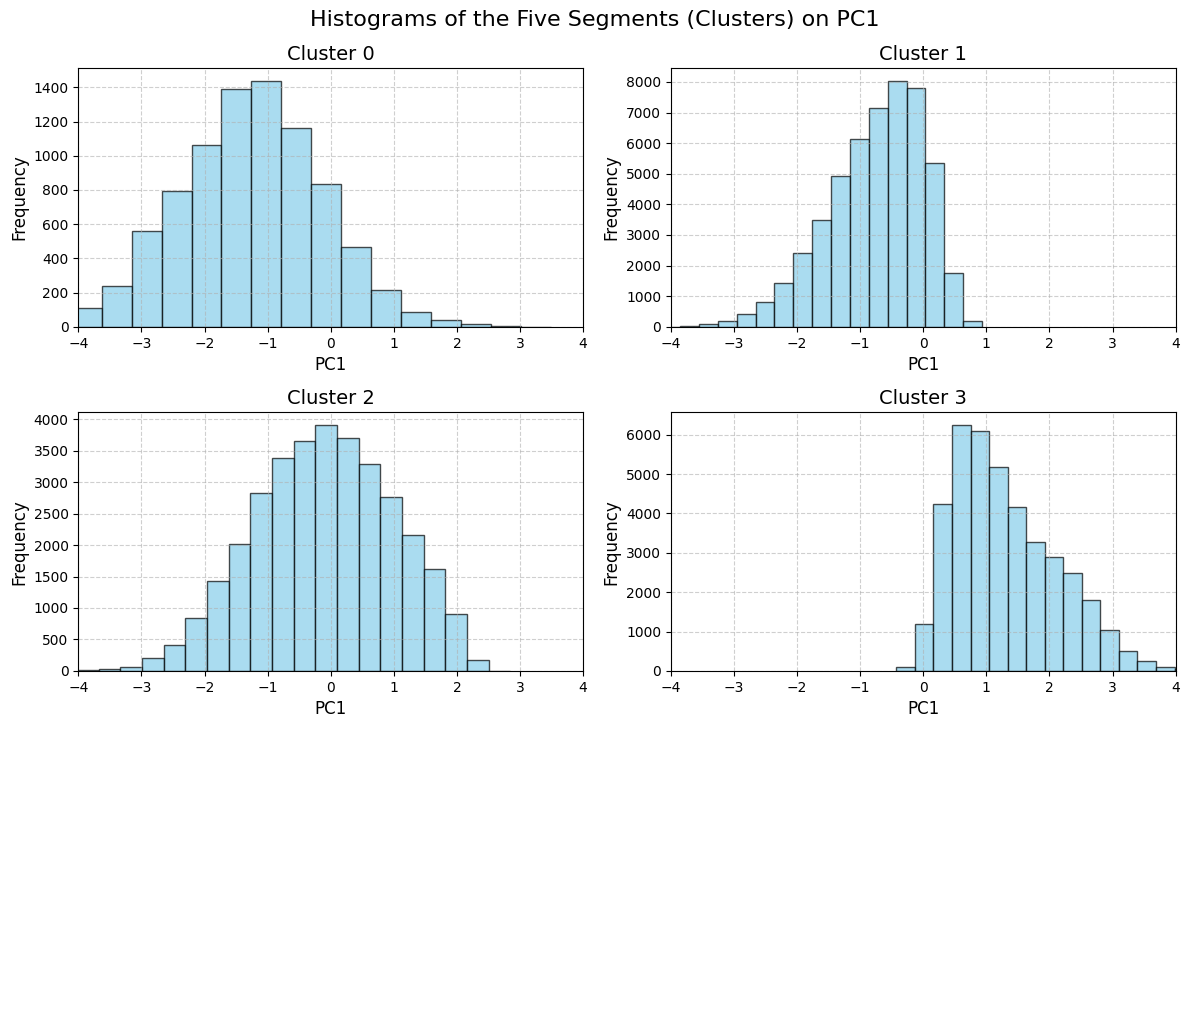

In [37]:
# Run k-means for k=4
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(X_pca)

# Plot histograms of PC1 for each cluster
plt.figure(figsize=(12, 10))

for cluster_id in range(k):
    plt.subplot(3, 2, cluster_id + 1)  # 3x2 grid

    cluster_data = X_pca[cluster_labels == cluster_id, 0]  # PC1 values for current cluster

    plt.hist(cluster_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Cluster {cluster_id}", fontsize=14)
    plt.xlabel("PC1", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xlim(-4, 4)
    plt.grid(True, linestyle='--', alpha=0.6)

# Turn off the empty subplot (6th)
plt.subplot(3, 2, 6).axis('off')

plt.tight_layout()
plt.suptitle("Histograms of the Five Segments (Clusters) on PC1", fontsize=16, y=1.02)

plt.show()


In [38]:
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, n_init=50, random_state=1234)
final_labels = final_kmeans.fit_predict(X)
X['Segment'] = final_labels


<ipython-input-38-f209147cdbf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Segment'] = final_labels


In [39]:
segment_profile = X.groupby('Segment').mean()
print(segment_profile)

         Trip_Distance  Type_of_Cab  Customer_Since_Months  Life_Style_Index  \
Segment                                                                        
0            96.794914     2.463817               6.671868          2.998383   
1            38.585844     2.195918               5.993628          2.783567   
2            64.610200     2.228054               6.449042          2.877606   
3            17.610945     2.152387               5.487017          2.698199   

         Confidence_Life_Style_Index  Destination_Type  Customer_Rating  \
Segment                                                                   
0                           1.547565          0.696593         2.815287   
1                           1.264430          0.827660         2.826506   
2                           1.536103          0.683833         2.768882   
3                           1.121207          1.560718         2.951734   

           Gender  Surge_Pricing_Type  
Segment                     

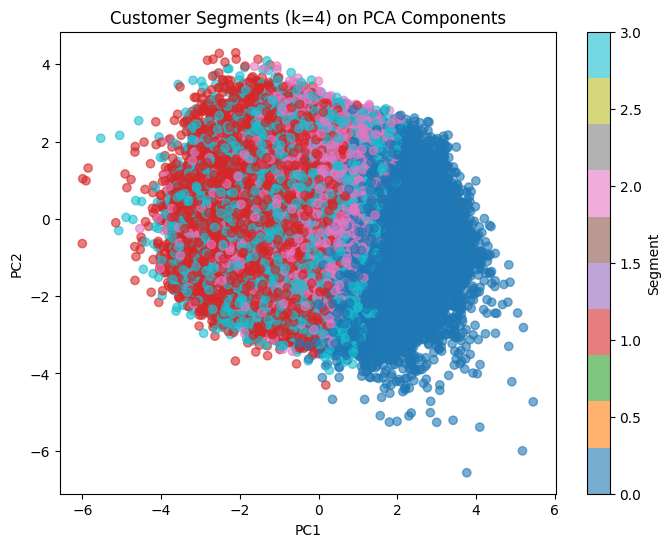

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1['Segment'], cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Customer Segments (k={optimal_k}) on PCA Components')
plt.colorbar(label='Segment')
plt.show()

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=1234)
mixture_labels = gmm.fit_predict(X_pca)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(X_pca)

contingency_table = pd.crosstab(index=pd.Series(kmeans_labels, name="KMeans"),
                                columns=pd.Series(mixture_labels, name="GMM"))
print(contingency_table)

gmm_random_init = GaussianMixture(n_components=4, covariance_type='diag', max_iter=200, n_init=1, random_state=1234)
gmm_random_init.fit(X_pca)

gmm_kmeans_init = GaussianMixture(n_components=4, covariance_type='diag', max_iter=200, init_params='kmeans', random_state=1234)
gmm_kmeans_init.fit(X_pca)

gmm_kmeans_labels = gmm_kmeans_init.predict(X_pca)
cross_tab_init = pd.crosstab(pd.Series(kmeans_labels, name="KMeans"),
                             pd.Series(gmm_kmeans_labels, name="GMM_with_KMeans_Init"))
print(cross_tab_init)

log_lik_kmeans_init = gmm_kmeans_init.score(X_pca) * X_pca.shape[0]
log_lik_random_init = gmm_random_init.score(X_pca) * X_pca.shape[0]

print(f"Log-Likelihood of GMM after KMeans initialization: {log_lik_kmeans_init:.2f}")
print(f"Log-Likelihood of GMM after random initialization: {log_lik_random_init:.2f}")


GMM         0      1      2      3
KMeans                            
0        2235   1913   3325    997
1           4  14168  22035  14008
2       33374      0      0      0
3        2149  10227  17585   9642
GMM_with_KMeans_Init     0      1      2      3
KMeans                                         
0                     8409      1     34     26
1                     7524    215  11935  30541
2                     4415   6071   9884  13004
3                     2777  23192  11323   2311
Log-Likelihood of GMM after KMeans initialization: -1605884.86
Log-Likelihood of GMM after random initialization: -1605884.86


In [42]:
data1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type,Segment
0,6.77,1,1.0,2.42769,0,0,3.90500,0,0,2,3
1,29.47,1,10.0,2.78245,1,0,3.45000,0,1,2,1
2,41.58,5,10.0,2.79805,3,4,3.50125,2,1,2,2
3,61.56,2,10.0,2.79805,3,0,3.45375,0,1,3,2
4,54.95,2,10.0,3.03453,1,0,3.40250,4,1,2,0


In [43]:
cluster_sizes = X['Segment'].value_counts().sort_index()
for i, size in cluster_sizes.items():
    print(f"Cluster {i + 1}: {size} customers")

Cluster 1: 13266 customers
Cluster 2: 48648 customers
Cluster 3: 30427 customers
Cluster 4: 39321 customers


In [44]:
import statsmodels.api as sm

for cluster in range(k):
    cluster_data = data1[data1['Segment'] == cluster].copy()
    y = cluster_data['Cancellation_Last_1Month']
    X_cluster = cluster_data.drop(columns=['Cancellation_Last_1Month', 'Segment'])
    X_cluster = pd.get_dummies(X_cluster, drop_first=True)
    y = y.loc[X_cluster.index]

    if len(X_cluster) > 1 and y.nunique() > 1:
        X_input = sm.add_constant(X_cluster)
        poisson_model = sm.GLM(y, X_input, family=sm.families.Poisson()).fit()
        print(f"\nCluster {cluster} Poisson Regression Results:\n")
        print(poisson_model.summary())
    else:
        print(f"\nCluster {cluster}: Not enough data variation for regression.\n")



Cluster 0 Poisson Regression Results:

                    Generalized Linear Model Regression Results                     
Dep. Variable:     Cancellation_Last_1Month   No. Observations:                28378
Model:                                  GLM   Df Residuals:                    28368
Model Family:                       Poisson   Df Model:                            9
Link Function:                          Log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -35954.
Date:                      Sun, 18 May 2025   Deviance:                       38503.
Time:                              12:19:50   Pearson chi2:                 3.88e+04
No. Iterations:                           5   Pseudo R-squ. (CS):            0.07606
Covariance Type:                  nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------

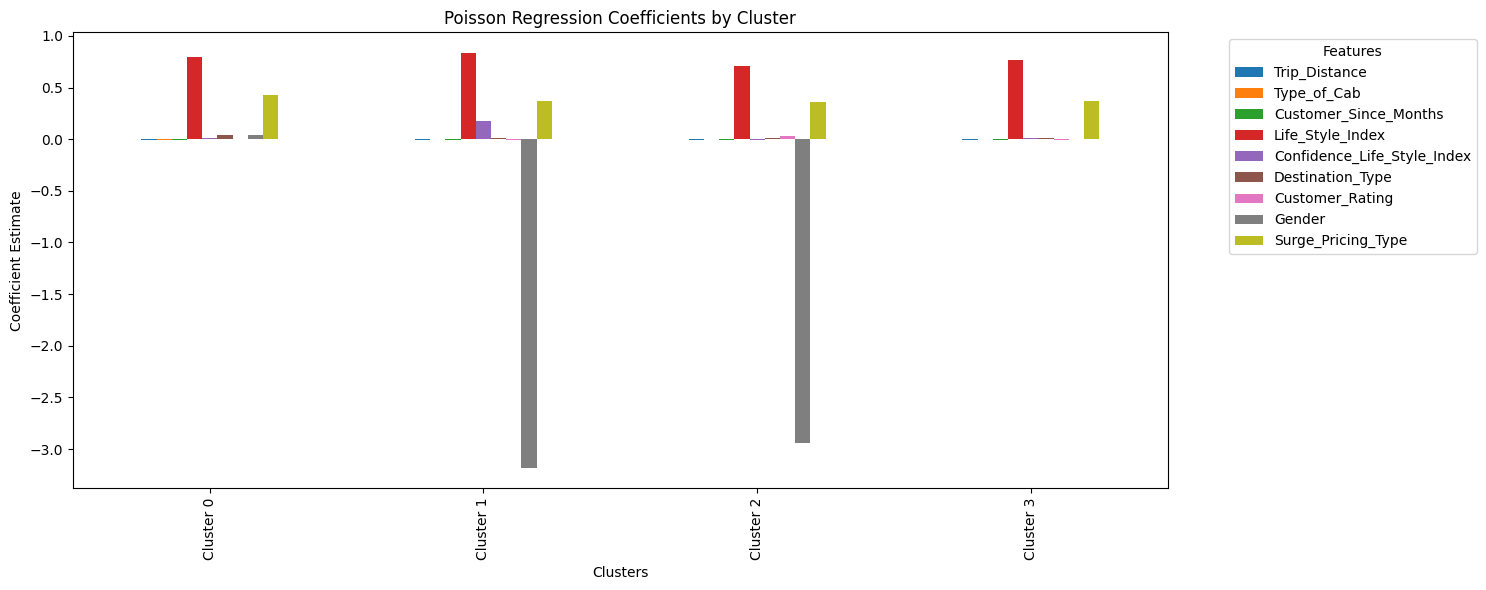

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

k = 4
coef_dfs = []

for cluster in range(k):
    cluster_data = data1[data1['Segment'] == cluster].copy()
    y = cluster_data['Cancellation_Last_1Month']
    X_cluster = cluster_data.drop(columns=['Cancellation_Last_1Month', 'Segment'], errors='ignore')
    X_cluster = pd.get_dummies(X_cluster, drop_first=True)
    y = y.loc[X_cluster.index]

    if len(X_cluster) > 1 and y.nunique() > 1:
        X_input = sm.add_constant(X_cluster)
        model = sm.GLM(y, X_input, family=sm.families.Poisson()).fit()
        coefs = model.params
        coefs.name = f'Cluster {cluster}'
        coef_dfs.append(coefs)

if coef_dfs:
    coef_df = pd.concat(coef_dfs, axis=1).fillna(0)
    coef_df = coef_df.drop('const', errors='ignore')

    coef_df.T.plot(kind='bar', figsize=(15, 6))
    plt.title('Poisson Regression Coefficients by Cluster')
    plt.ylabel('Coefficient Estimate')
    plt.xlabel('Clusters')
    plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No models were fitted to plot coefficients.")


<ipython-input-46-d1a866946e8d>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette="Set2")
<ipython-input-46-d1a866946e8d>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_marker[idx]:
<ipython-input-46-d1a866946e8d>:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-46-d1a866946e8d>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

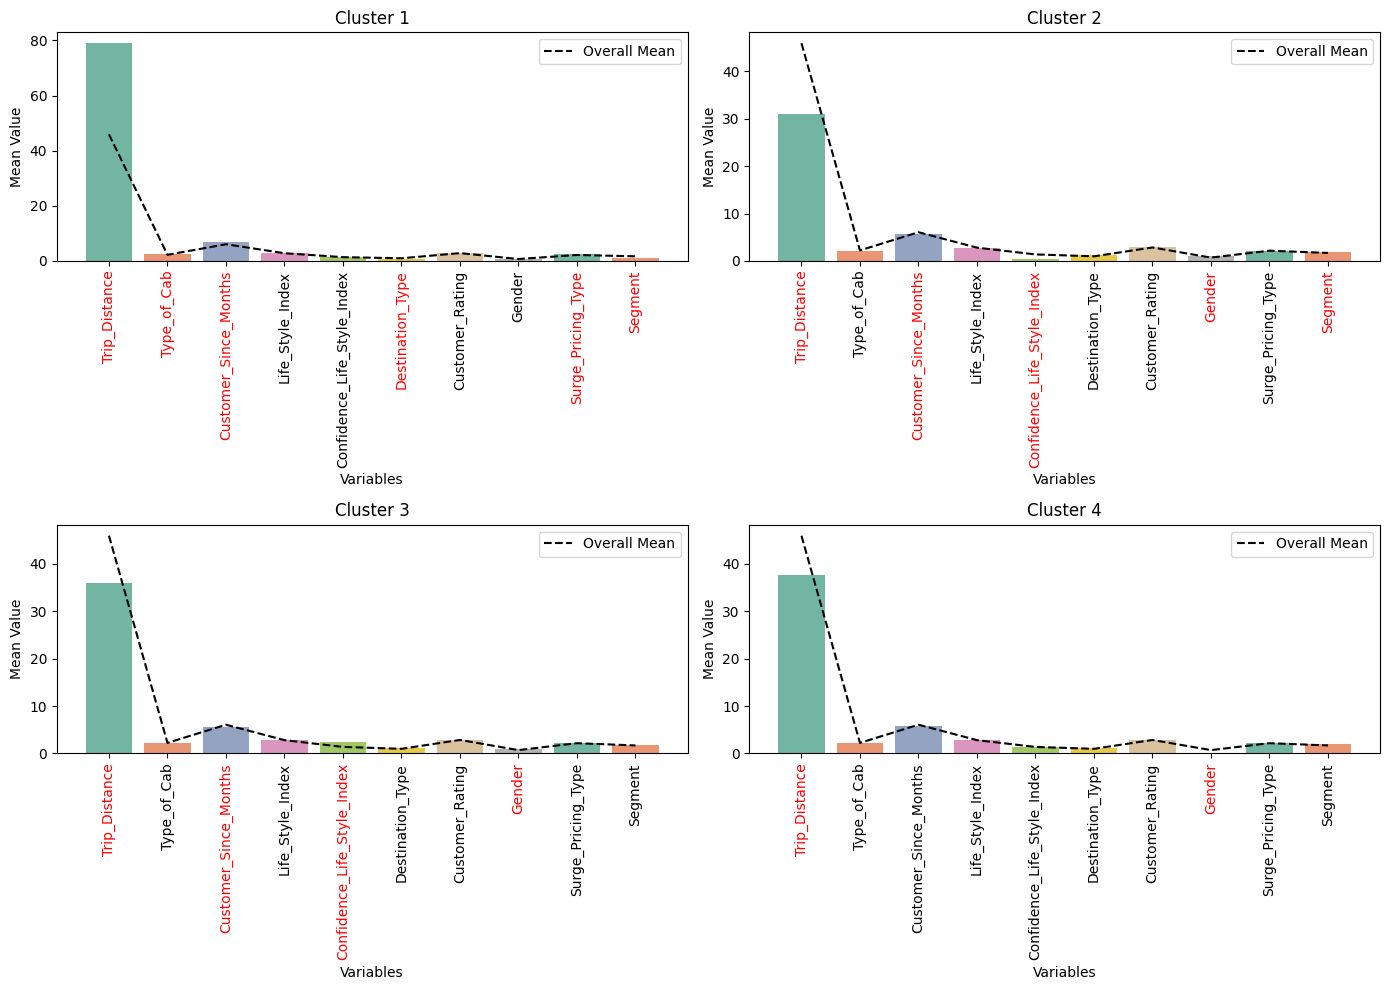

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

k = 4

cluster_assignments = data1['Segment']

segment_profiles = X.copy()
segment_profiles['Cluster'] = cluster_assignments

mean_profiles = segment_profiles.groupby('Cluster').mean().T

MD_x_t = mean_profiles.T
distance_matrix = pdist(MD_x_t, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
dendro = dendrogram(linked, no_plot=True)

row_order = dendro['leaves']
ordered_variables = [mean_profiles.columns[i] for i in row_order]

ordered_profiles = mean_profiles[ordered_variables]

overall_means = mean_profiles.mean(axis=1)

fig, axes = plt.subplots((k + 1)//2, 2, figsize=(14, k*2.5))
axes = axes.flatten()

threshold_abs = 0.25
threshold_rel = 0.5

for cluster_num in range(k):
    ax = axes[cluster_num]
    cluster_data = ordered_profiles.iloc[:, cluster_num]

    is_marker = ((cluster_data - overall_means).abs() > threshold_abs) | \
                (((cluster_data - overall_means).abs() / overall_means.abs()) > threshold_rel)

    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette="Set2")

    for idx, tick in enumerate(ax.get_xticklabels()):
        if is_marker[idx]:
            tick.set_color('red')

    ax.plot(cluster_data.index, [overall_means.loc[var] for var in cluster_data.index],
            linestyle="--", color="black", label="Overall Mean")

    ax.set_title(f'Cluster {cluster_num + 1}')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Mean Value')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

for i in range(k, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


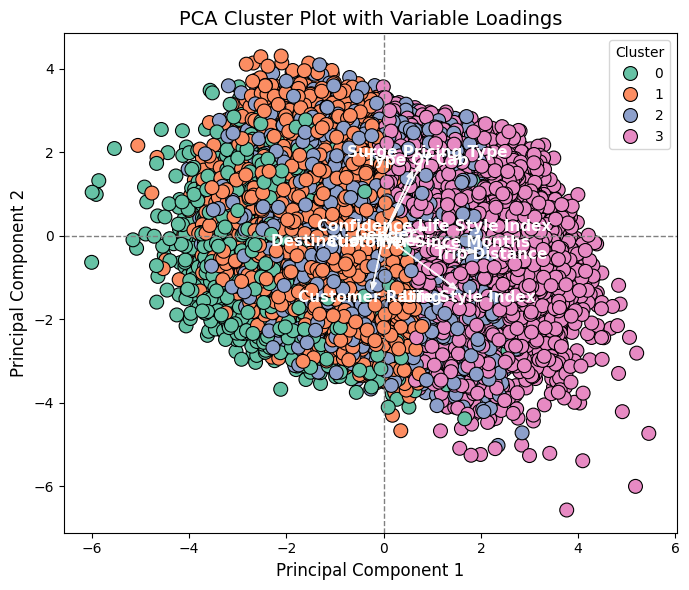

In [47]:
import re

# Create DataFrame
pca_data1 = pd.DataFrame(data=X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pca_data1['Cluster'] = cluster_labels
def prettify_var_name(name):
    name = re.sub(r'_', ' ', name)
    name = ' '.join(word.capitalize() for word in name.split())
    return name

plt.figure(figsize=(7, 6))
sns.scatterplot(data=pca_data1, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, edgecolor='black')

loadings = pca.components_.T
variables = features
arrow_scale = 3

for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i, 0]*arrow_scale, loadings[i, 1]*arrow_scale,
              color='white', alpha=0.9, width=0.01, head_width=0.12, length_includes_head=True)
    plt.text(loadings[i, 0]*arrow_scale*1.15, loadings[i, 1]*arrow_scale*1.15,
             prettify_var_name(var), color='white', ha='center', va='center', fontsize=11, weight='bold')

plt.title('PCA Cluster Plot with Variable Loadings', fontsize=14, color='black')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.axhline(0, color='grey', lw=1, linestyle='--')
plt.axvline(0, color='grey', lw=1, linestyle='--')
plt.tight_layout()
plt.show()


<Figure size 2000x1500 with 0 Axes>

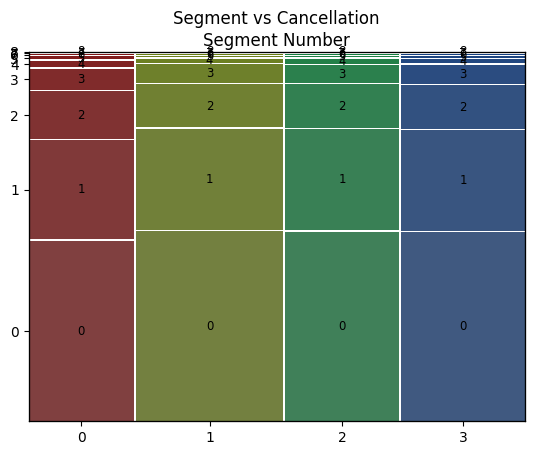

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

cross_tab = pd.crosstab(data1['Segment'], data1['Cancellation_Last_1Month'])

plt.figure(figsize=(20, 15))
mosaic(cross_tab.stack(), title="Segment vs Cancellation", labelizer=lambda k: f"{k[1]}", axes_label=True)
plt.xlabel('Segment Number', fontsize=12)
plt.ylabel('Cancellation (Last 1 Month)', fontsize=12)
plt.show()


<Figure size 800x600 with 0 Axes>

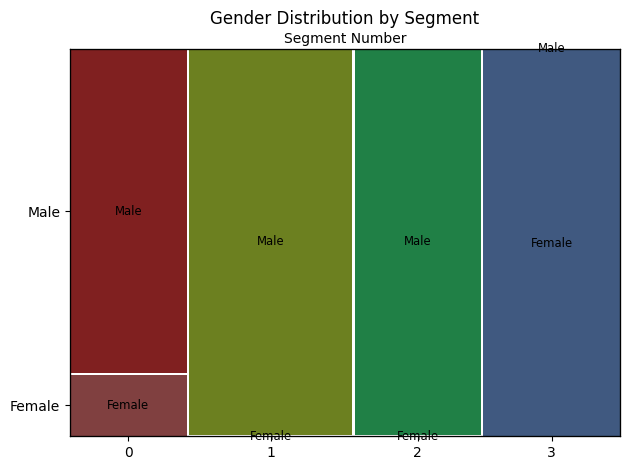

<Figure size 800x600 with 0 Axes>

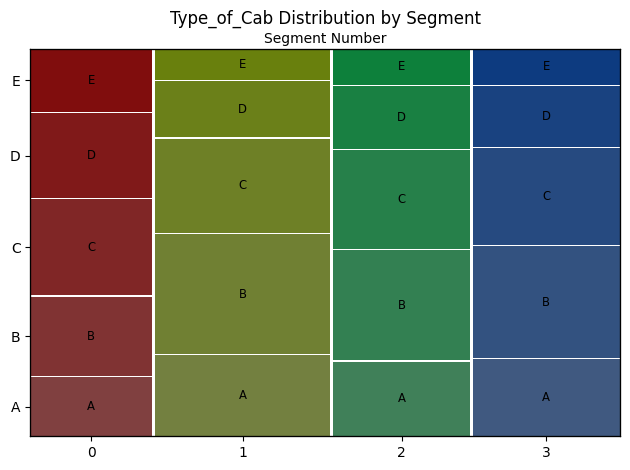

<Figure size 800x600 with 0 Axes>

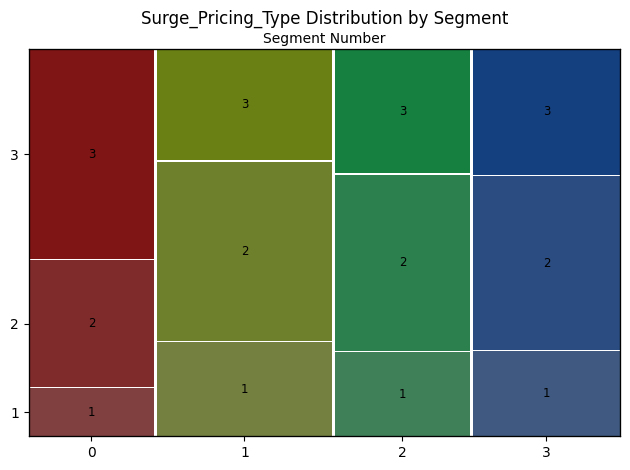

<Figure size 800x600 with 0 Axes>

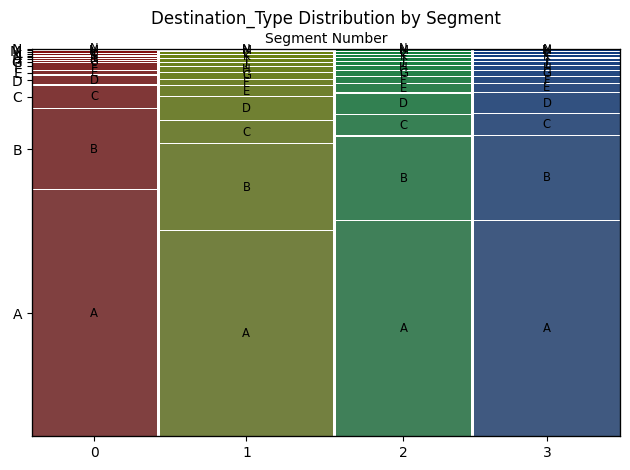

In [49]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

categorical_vars = ['Gender', 'Type_of_Cab', 'Surge_Pricing_Type', 'Destination_Type']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    cross_tab = pd.crosstab(data1['Segment'], data11[var])
    mosaic(cross_tab.stack(), title=f"{var} Distribution by Segment",
           labelizer=lambda k: f"{k[1]}")
    plt.xlabel('Segment Number')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


Working with data2

In [50]:
data2 = pd.read_csv("https://raw.githubusercontent.com/sukhpreet111/CAB-BOOKING/refs/heads/main/Uber%20Request%20Data.csv")

In [51]:
data2['Request timestamp'] = pd.to_datetime(data2['Request timestamp'], errors='coerce')
data2['Drop timestamp'] = pd.to_datetime(data2['Drop timestamp'], errors='coerce')

In [52]:
def map_hour_to_period(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [53]:
# Apply mapping
data2['hour'] = data2['Request timestamp'].dt.hour
data2['time_of_day'] = data2['hour'].apply(map_hour_to_period)


In [54]:
data2['trip_duration_mins'] = (data2['Drop timestamp'] - data2['Request timestamp']).dt.total_seconds() / 60  # in minutes
data2['trip_duration_hours'] = data2['trip_duration_mins']/60
data2['trip_duration_hours'] = data2['trip_duration_hours'].round(2)

In [55]:
data2.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,4071
Drop timestamp,5595
hour,4071
time_of_day,0
trip_duration_mins,5595
trip_duration_hours,5595


In [56]:
count = (data2['trip_duration_hours'] > 24).sum()
print(f"Number of trip durations greater than 24: {count}")


Number of trip durations greater than 24: 19


In [57]:
obj_cols = data2.select_dtypes(include=['object']).columns
data2[obj_cols] = data2[obj_cols].fillna('Unknown')
num_cols = data2.select_dtypes(include=['number']).columns
data2[num_cols] = data2[num_cols].fillna(0)
date_cols = data2.select_dtypes(include=['datetime64[ns]']).columns
data2[date_cols] = data2[date_cols].fillna('0')

In [58]:
features1 = ['Pickup point','time_of_day','trip_duration_hours']
X1 = data2[features1]

In [59]:
from sklearn.preprocessing import LabelEncoder
for col in X1.select_dtypes(include='object').columns:
    X1[col] = LabelEncoder().fit_transform(X1[col])

<ipython-input-59-269af7eff9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[col] = LabelEncoder().fit_transform(X1[col])
<ipython-input-59-269af7eff9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[col] = LabelEncoder().fit_transform(X1[col])


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X1)

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
X1['Segment'] = kmeans.fit_predict(X_scaled_1)
print(X1.groupby('Segment')[features1].mean())

         Pickup point  time_of_day  trip_duration_hours
Segment                                                
0            1.000000     4.737711             0.077341
1            0.000000     4.270911             0.101527
2            0.473684     5.000000           696.951579
3            0.721095     0.831643             0.479006


<ipython-input-61-c8ec0809658a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Segment'] = kmeans.fit_predict(X_scaled_1)


<Figure size 1200x500 with 0 Axes>

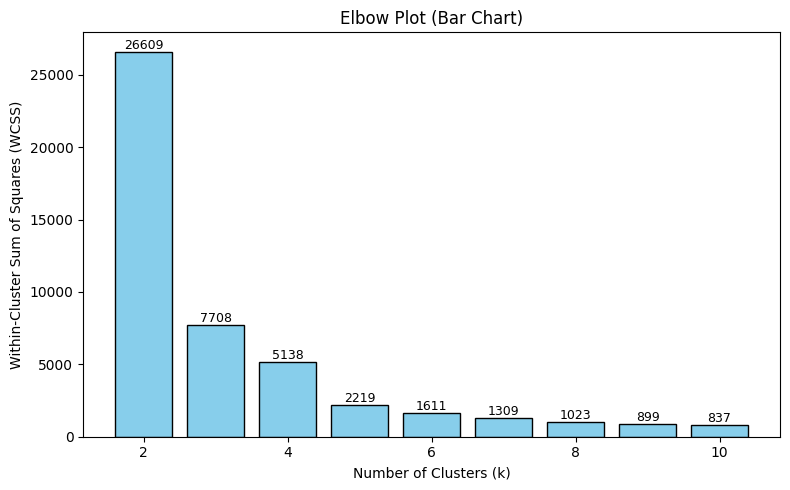

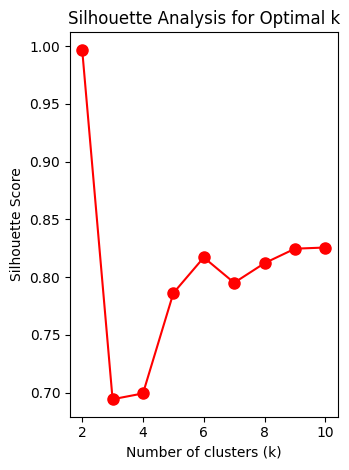

In [62]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)

    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X1, labels))

# Plotting
plt.figure(figsize=(12,5))

# Elbow plot
# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(k_values, wcss, color='skyblue', edgecolor='black')
plt.title('Elbow Plot (Bar Chart)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

k value is obtained as 3 from this

In [63]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X1)
X1['Cluster'] = clusters
print(X1['Cluster'].value_counts())


Cluster
0    5149
2    1577
1      19
Name: count, dtype: int64


<ipython-input-63-39a496888c97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster'] = clusters


In [64]:
segment_means = X1.groupby('Cluster').mean().round(3)

print(segment_means)

         Pickup point  time_of_day  trip_duration_hours  Segment
Cluster                                                         
0               0.541        4.784                0.079    0.459
1               0.474        5.000              696.952    2.000
2               0.451        1.269                0.369    2.250


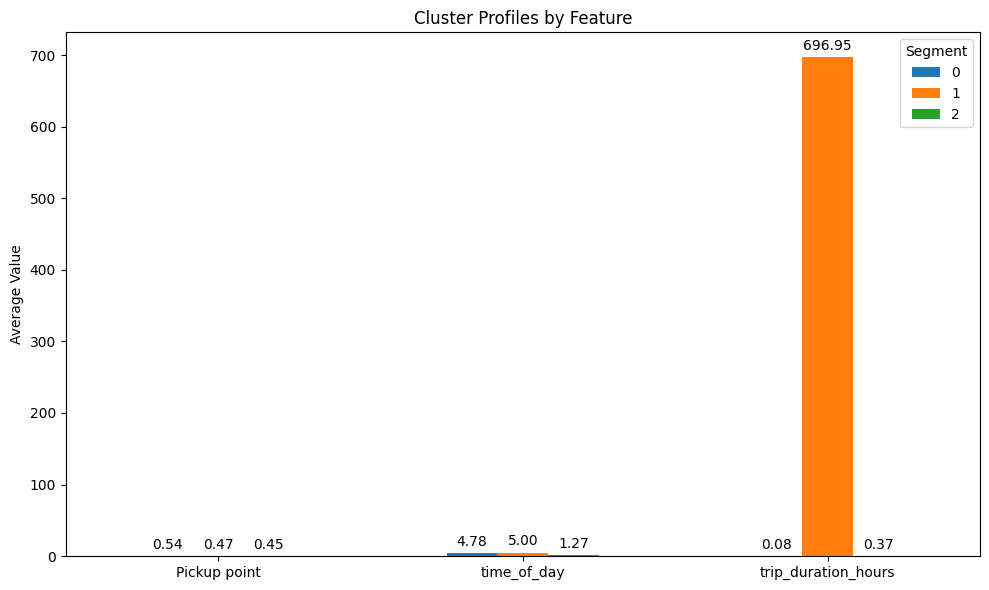

In [65]:
import matplotlib.pyplot as plt

# Compute segment profile
segment_profile = X1.groupby('Cluster')[['Pickup point', 'time_of_day', 'trip_duration_hours']].mean()

# Transpose and plot
ax = segment_profile.T.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles by Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Segment')
plt.tight_layout()

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


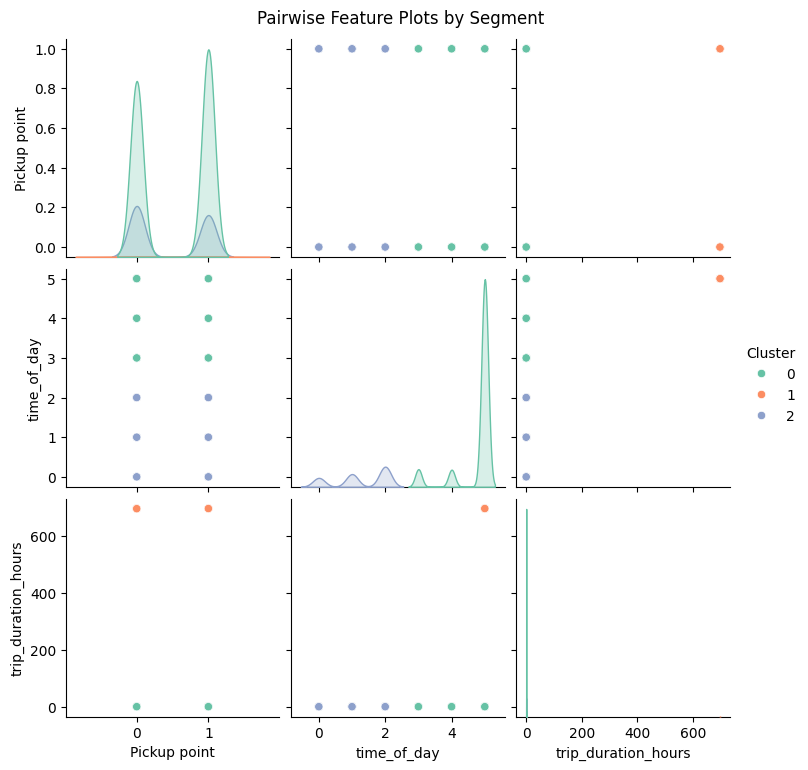

In [66]:
subset = X1[['Pickup point', 'time_of_day', 'trip_duration_hours', 'Cluster']]
sns.pairplot(subset, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Pairwise Feature Plots by Segment", y=1.02)
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
# Encode target
le = LabelEncoder()
y = data2['Status']
y_encoded = le.fit_transform(y)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Encode target
le = LabelEncoder()
y = le.fit_transform(data2['Status'])

# Features
X = X1[['Pickup point', 'time_of_day', 'trip_duration_hours']]

# Standardize and fit model
model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
model.fit(X, y)

# Extract coefficients
lr = model.named_steps['logisticregression']
coefs = pd.DataFrame(lr.coef_, columns=X.columns, index=le.classes_)

print("Multinomial Logistic Regression Coefficients:")
print(coefs)


Multinomial Logistic Regression Coefficients:
                   Pickup point  time_of_day  trip_duration_hours
Cancelled              0.640246    -0.076077            -4.867245
No Cars Available     -0.504841     0.061757            -7.954485
Trip Completed        -0.135404     0.014320            12.821731


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


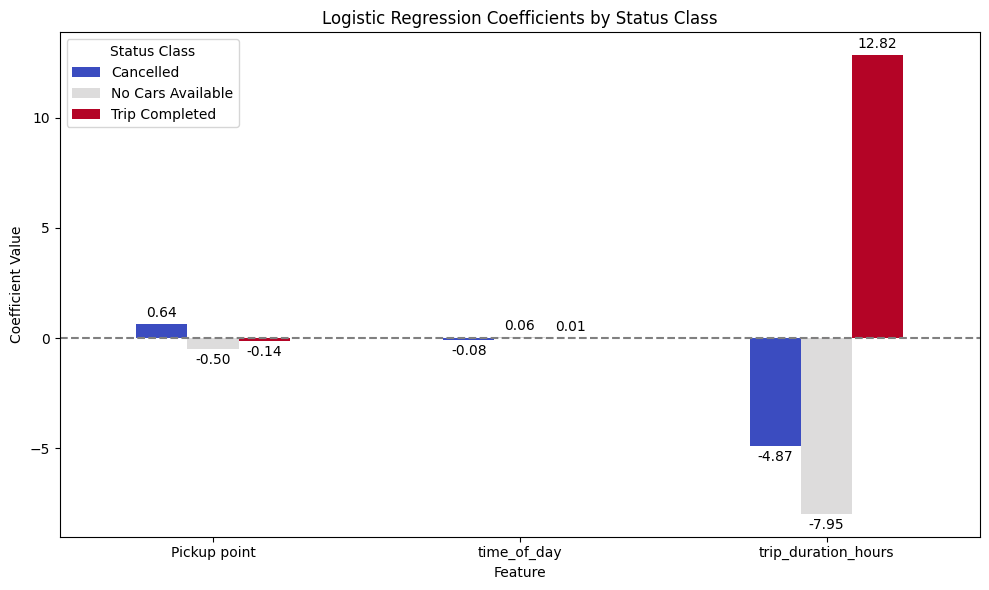

In [69]:
ax = coefs.T.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients by Status Class')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=0)
plt.legend(title='Status Class')
plt.tight_layout()

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()
